In [1]:
# Urutan untuk Proses Tokenisasi menggunakan Embedding dan Global Average Pooling 1D
# 1. Import Library
# 2. Unpack dataset (bila itu ZIP)
# --- Preprocess Data ---
# 3. Buat fungsi stopword
# 4. Masukkan data ke dalam list dengan fungsi parse data from file
# 5. Split data menjadi training dan validasi
# --- Tokenisasi Proses ---
# 6. Buat fungsi Tokenizer
# 7. Buat fungsi Seq & Pad
# 8. Buat fungsi tokenizer(khusus label)
# --- Model ---
# 9. Buat Model
# 10. Fit Model

In [3]:
# Import Library
import csv
import io
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [6]:
with open('bbc-text.csv', 'r') as csvfile:
  print(f"kalimat pertama {csvfile.readline()}")
  print(f"kalimat pertama {csvfile.readline()}")

kalimat pertama category,text

kalimat pertama tech,tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more pe

In [8]:
df = pd.read_csv('bbc-text.csv')
print(df.shape)
df.head()

(2225, 2)


,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [9]:
# Parameter
NUM_WORDS = 1000
EMBEDDING_DIM = 16
MAXLEN = 120
PADDING = 'post'
OOV_TOKEN = "<OOV>"
TRAINING_SPLIT = .8

In [54]:
# grader-required-cell

def remove_stopwords(sentence):
    """
    Removes a list of stopwords

    Args:
        sentence (string): sentence to remove the stopwords from

    Returns:
        sentence (string): lowercase sentence without the stopwords
    """
    # List of stopwords
    stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

    # Sentence converted to lowercase-only
    sentence = sentence.lower()

    words = sentence.split()
    no_words = [w for w in words if w not in stopwords]
    sentence = " ".join(no_words)

    return sentence


def parse_data_from_file(filename):
    """
    Extracts sentences and labels from a CSV file

    Args:
        filename (string): path to the CSV file

    Returns:
        sentences, labels (list of string, list of string): tuple containing lists of sentences and labels
    """
    sentences = []
    labels = []
    with open(filename, 'r') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        next(reader)
        for row in reader:
            labels.append(row[0])
            # sentence = row[1]
            # sentence = remove_stopwords(sentence)
            # sentences.append(sentence)
            sentences.append(remove_stopwords(row[1]))

    return sentences, labels

In [55]:
sentences, labels = parse_data_from_file('bbc-text.csv')
print(len(sentences))
print(len(sentences[0].split()))
print(len(labels))
print(int(len(sentences)*TRAINING_SPLIT))

2225
436
2225
1780


In [56]:
def train_val_split(sentences, labels, training_split):
  train_size = int(len(sentences)*TRAINING_SPLIT)

  training_sentences = sentences[:train_size]
  training_labels = labels[:train_size]

  validation_sentences = sentences[train_size:]
  validation_labels = labels[train_size:]

  return training_sentences, validation_sentences, training_labels, validation_labels

In [57]:
training_sentences, validation_sentences, training_labels, validation_labels = train_val_split(sentences, labels, TRAINING_SPLIT)
print(len(training_sentences))
print(len(validation_sentences))
print(len(training_labels))
print(len(validation_labels))

1780
445
1780
445


In [35]:
# grader-required-cell

# GRADED FUNCTION: fit_tokenizer
def fit_tokenizer(train_sentences, num_words, oov_token):
    """
    Instantiates the Tokenizer class on the training sentences

    Args:
        train_sentences (list of string): lower-cased sentences without stopwords to be used for training
        num_words (int) - number of words to keep when tokenizing
        oov_token (string) - symbol for the out-of-vocabulary token

    Returns:
        tokenizer (object): an instance of the Tokenizer class containing the word-index dictionary
    """

    ### START CODE HERE

    # Instantiate the Tokenizer class, passing in the correct values for num_words and oov_token
    tokenizer = Tokenizer(num_words=num_words, oov_token=oov_token)

    # Fit the tokenizer to the training sentences
    tokenizer.fit_on_texts(train_sentences)

    ### END CODE HERE

    return tokenizer

In [58]:
# Test your function
tokenizer = fit_tokenizer(training_sentences, NUM_WORDS, OOV_TOKEN)
word_index = tokenizer.word_index

print(f"Vocabulary contains {len(word_index)} words\n")
print("<OOV> token included in vocabulary" if "<OOV>" in word_index else "<OOV> token NOT included in vocabulary")

Vocabulary contains 27285 words

<OOV> token included in vocabulary


In [39]:
def seq_pad(sentence, tokenizer, padding, maxlen):
  sequences = tokenizer.texts_to_sequences(sentence)
  padded = pad_sequences(sequences, maxlen=maxlen, padding=padding )

  return padded

In [41]:
train_padded_seq = seq_pad(training_sentences, tokenizer, PADDING, MAXLEN)
val_padded_seq = seq_pad(validation_sentences, tokenizer, PADDING, MAXLEN)

print(f'ukuran train padded seq {train_padded_seq.shape}')
print(f'ukuran val padded seq {val_padded_seq.shape}')

ukuran train padded seq (1780, 120)
ukuran val padded seq (445, 120)


In [42]:
def tokenize_labels(all_labels, split_labels):
  label_tokenizer = Tokenizer()
  label_tokenizer.fit_on_texts(all_labels)

  label_seq = label_tokenizer.texts_to_sequences(split_labels)
  label_seq_np = np.array(label_seq)-1

  return label_seq_np

In [43]:
train_label_seq = tokenize_labels(labels, training_labels)
val_label_seq = tokenize_labels(labels, validation_labels)

In [44]:
print(train_label_seq.shape)
print(val_label_seq.shape)

(1780, 1)
(445, 1)


In [45]:
def create_model(num_words, embedding_dim, maxlen):
  tf.random.set_seed(123)

  model = tf.keras.Sequential([
      tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
      tf.keras.layers.GlobalAveragePooling1D(),
      tf.keras.layers.Dense(24, activation='relu'),
      tf.keras.layers.Dense(5, activation='softmax')
  ])

  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model

In [47]:
model = create_model(NUM_WORDS, EMBEDDING_DIM, MAXLEN)
history = model.fit(train_padded_seq, train_label_seq, epochs=30, validation_data=(val_padded_seq, val_label_seq))

Epoch 1/30
56/56 [==============================] - 1s 8ms/step - loss: 1.5998 - accuracy: 0.3045 - val_loss: 1.5844 - val_accuracy: 0.2876
Epoch 2/30
56/56 [==============================] - 0s 7ms/step - loss: 1.5568 - accuracy: 0.3669 - val_loss: 1.5219 - val_accuracy: 0.4809
Epoch 3/30
56/56 [==============================] - 0s 7ms/step - loss: 1.4557 - accuracy: 0.5865 - val_loss: 1.3920 - val_accuracy: 0.6854
Epoch 4/30
56/56 [==============================] - 0s 7ms/step - loss: 1.2774 - accuracy: 0.7556 - val_loss: 1.1990 - val_accuracy: 0.8000
Epoch 5/30
56/56 [==============================] - 0s 7ms/step - loss: 1.0547 - accuracy: 0.8438 - val_loss: 0.9893 - val_accuracy: 0.8382
Epoch 6/30
56/56 [==============================] - 0s 7ms/step - loss: 0.8357 - accuracy: 0.9028 - val_loss: 0.8029 - val_accuracy: 0.8674
Epoch 7/30
56/56 [==============================] - 0s 6ms/step - loss: 0.6486 - accuracy: 0.9219 - val_loss: 0.6477 - val_accuracy: 0.8831
Epoch 8/30
56/56 [==

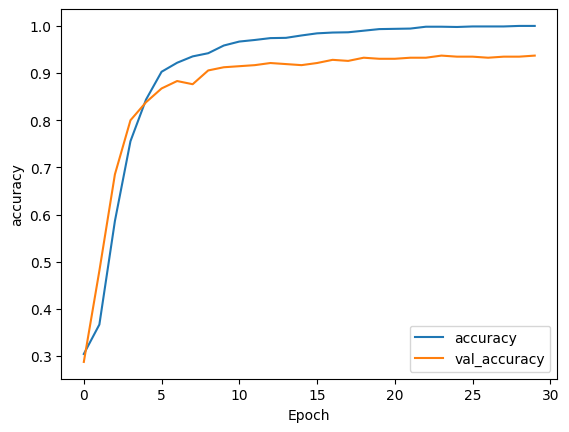

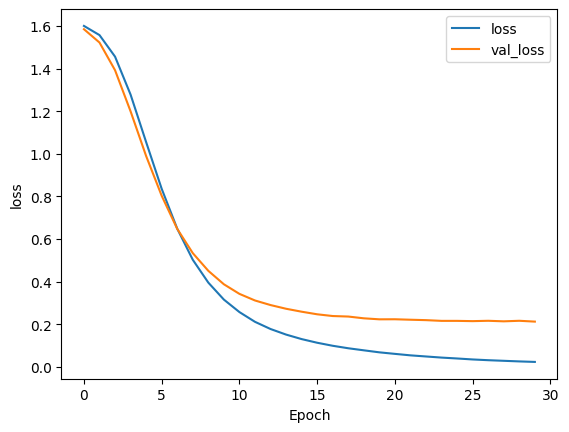

In [49]:
import matplotlib.pyplot as plt
def plot_graph(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history[f'val_{metric}'])
  plt.xlabel("Epoch")
  plt.ylabel(metric)
  plt.legend([metric, f'val_{metric}'])
  plt.show()

plot_graph(history, 'accuracy')
plot_graph(history, 'loss')